###  KNN, Naive Bayes Classifier, and ROC/AUC analysis

- #### Aims:
    - ##### Implement a KNN classifier
    - ##### Implement a Naive Bayes classifier
    - ##### Compare the two classifiers with ROC and AUC

In [1]:
import numpy as np
import pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score 
from collections import Counter

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

#### Task 1:  Implement a KNN classifier


##### Task 1.1: Load classification data
Download `trainx.csv` and `testx.csv` from Moodle. In trainx.csv, each row corresponds to an instance. The first two columns are the values for two features and the third is the class label. The same format is used in `testx.csv`. Load these datasets into python (numpy.loadtxt) and create an X matrix consisting of the first two columns and a t vector as the last one. Do the same for the test data so you have four objects: $\mathbf{X}$, $\mathbf{X}_{test}$, $\mathbf{t}$ and $\mathbf{t}_{test}$.

In [2]:
X_train = np.loadtxt('X_train.csv', delimiter=',', skiprows=1)
X_test = np.loadtxt('X_test.csv', delimiter=',', skiprows=1)
Y_train = np.loadtxt('y_train.csv', delimiter=',', skiprows=1)[:,1][:,None]
from sklearn.decomposition import PCA
from sklearn import feature_selection

# Make an instance of the Model
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

fs=feature_selection.SelectPercentile(percentile=3)
X_train=fs.fit_transform(X_train,Y_train)
X_test = fs.transform(X_test)
print(X_train.shape)
    

(200, 4)


C:\Users\yingt\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\yingt\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [85] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\yingt\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [3]:
cross_X_train, cross_X_test, cross_Y_train, cross_Y_test = train_test_split(X_train,Y_train, test_size=0.5,random_state=1234)

In [4]:
ctrain = Counter(cross_Y_train.flatten())

In [5]:
ctrain

Counter({1.0: 50, 2.0: 50})

In [6]:
ctest = Counter(cross_Y_test.flatten())

In [7]:
ctest

Counter({1.0: 44, 2.0: 56})

##### Task 1.2: Write a KNN function for a single test example (a row)
Implement a KNN function that takes a single test example and a value of K and returns a classification. Your function should find the K closest (see below) training points to the test point and return the majority class
amongst these training points.

If your training data is in a numpy array with 100 rows and 2 columns, then the distance between a test point and the ith row is given by:

`sq_diff = (test_row - trainx[i,:])**2
dist = np.sqrt(sq_diff.sum())`

where test_row is a row of $\mathbf{X}_{test}$.
The first line creates a new vector which holds the squared difference of the two pairs of values. The second line takes the sum of these differences and then takes the square root. This is computing the Euclidean distance. Other distance metrics could also be used.

The `zip`, `sorted` and `numpy`'s `unique` can be helpful for finding the nearest neighbours.

Make sure your function returns both the predicted class and predicted score. For KNN, the score can be the percentage of votes for each class. 

In [8]:
def knn_classifier(trainX, traint, test_data, K):
    distances = np.sqrt( ((trainX - test_data)**2).sum(axis=1)) # computing distances from the testing data to all training data
    dc = zip(distances, traint) 
    dc = sorted(dc, key = lambda x: x[0]) # sort distance 
    selected_neighbor = np.asarray(dc[:K]) # select K number of neareast neighbours
    classes, counts = np.unique(selected_neighbor[:,1], return_counts=True)
    prediction = {}
    prediction["predicted_class"] = classes[counts.argmax()]
    
    if ( len(classes) == 1 and classes[counts.argmax()] == 2.0):
        prediction["predicted_score"] = np.hstack( (1.0- (1.0*counts/sum(counts)), 1.0*counts/sum(counts) ) )
    elif ( len(classes) == 1 and classes[counts.argmax()] == 1.0):
        prediction["predicted_score"] = np.hstack( ( 1.0*counts/sum(counts), 1.0- (1.0*counts/sum(counts)) ) )
    else:
        prediction["predicted_score"] = 1.0*counts/sum(counts)
    return(prediction)

##### Task 1.4: Plot Accuracy vs K 

Test your function with a range of possible `K`, and compare accuracies on all test data. Plot the results.

24
0.87


Text(0, 0.5, 'Accuracy')

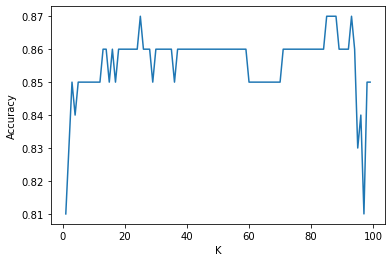

In [9]:
Kvals = np.arange(1,100,1)
accuracy = []

for k in Kvals:
    correct = 0
    for i,row in enumerate(cross_X_test):
        c = knn_classifier(cross_X_train,cross_Y_train,row,K=k)["predicted_class"]
        if c == cross_Y_test[i]:
            correct += 1
    accuracy.append(1.0*correct / (1.0*len(cross_X_test)))
print(np.array(accuracy).argmax())
print(max(accuracy))

plt.figure()
plt.plot(Kvals,accuracy)
plt.xlabel("K")
plt.ylabel("Accuracy")

##### Task 1.3: Test with a test point

In [10]:
y_prediction = []
for i in range(len(X_test)):
    c = knn_classifier(X_train,Y_train,X_test[i,:],K=24)
    y_prediction.append(c["predicted_class"])
y_prediction = np.array(y_prediction)

In [11]:
test_header = "Id,EpiOrStroma"
n_points = X_test.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = range(n_points)
y_pred_pp[:, 1] = y_prediction[:,0]
print(y_pred_pp)

np.savetxt('my_submission_knn_cl.csv', y_pred_pp, fmt='%d', delimiter=",",header=test_header, comments="")

[[  0.   2.]
 [  1.   2.]
 [  2.   2.]
 ...
 [795.   1.]
 [796.   2.]
 [797.   2.]]


#### Task 2:  Implement a Naive Bayes classifier

##### Task 2.1: Write your function to train a Gaussian Naive Bayes classifier
We will use Gaussian distributions for each class. For each class, we fit a Gaussian to each dimension (by compute the mean and variance). The prior for each class will be the proportion of training data in that class.

##### Task 2.2: Write your function to make prediction on testX with the trained Gaussian Naive Bayes classifier 

Computing the likelihood for each class and multiplying by the prior, and normalise. Make sure you function also returns the probability of assigning the test data to each class.

In [12]:
def nb_train(X_train, y_train):
    priori = dict()
    counter = Counter(y_train)
    for label, counts in counter.items():
        priori[label] = counts / len(y_train)
    stats = dict()
    for label in set(y_train):
        indices = np.where(y_train == label)[0]
        stats[label] = dict()
        stats[label]['mean'] = X_train[indices].mean(axis=0)
        stats[label]['var'] = X_train[indices].var(axis=0)
    return priori, stats

In [13]:
def nb_predict(priori, stats, sample):
    post = {k: v for k, v in priori.items()}
    for label in priori.keys():
        mean = stats[label]['mean']
        var = stats[label]['var']
        p = 1. / (np.sqrt(2 * np.pi) * var) * np.exp(- (sample - mean) ** 2 / (2 * var ** 2))
        post[label] *= np.prod(p)

    s = sum(post.values())
    for label in post:
        post[label] /= s
    pred = max(post, key=lambda x: post[x])
    return post, pred


def predict(priori, stats, data):
    p = [nb_predict(priori, stats, sample) for sample in data]
    p_label = np.array([item[1] for item in p])
    prob = np.array([item[0][2.] for item in p])
    return p_label, prob

##### Task 2.3:  Make predictions
Loop through the test points, 

In [14]:
cross_X_train, cross_Y_train = cross_X_train, cross_Y_train.flatten()
cross_X_test, cross_Y_test = cross_X_test, cross_Y_test.flatten()


In [15]:
cross_priori, cross_stats = nb_train(cross_X_train, cross_Y_train)

Compute the accuracy of the classifier. Train accuracy & test accuracy.

In [16]:
cross_y_test_pred, cross_y_test_prob = predict(cross_priori, cross_stats, cross_X_test)
np.mean(cross_Y_test == cross_y_test_pred)

0.84

In [17]:
X_train,Y_train = X_train,Y_train.flatten()
priori, stats = nb_train(X_train,Y_train)
y_test_pred, y_test_prob = predict(priori, stats,X_test)
print(y_test_pred.shape)

(798,)


In [18]:
test_header = "Id,EpiOrStroma"
n_points = X_test.shape[0]
print(X_test.shape[0])
y_pred_pp_b = np.ones((n_points, 2))
y_pred_pp_b[:, 0] = range(n_points)
y_pred_pp_b[:, 1] = y_test_pred
print(y_pred_pp_b)
np.savetxt('my_submission_b_cl.csv', y_pred_pp_b, fmt='%d', delimiter=",",header=test_header, comments="")

798
[[  0.   2.]
 [  1.   2.]
 [  2.   2.]
 ...
 [795.   1.]
 [796.   2.]
 [797.   2.]]


#### Task 3:  Comparing classifiers with ROC and AUC

#### Task 3.1: Plot the ROC curve for your Gaussian Naive Bayes classifier. 

In this task you can use the `roc_curve` and `roc_auc_score` function from `sklearn`

Details of `roc_curve` http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
Details of `roc_auc_score` http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html


#### Task 3:  Comparing classifiers with ROC and AUC

#### Task 3.1: Plot the ROC curve for your Gaussian Naive Bayes classifier. 

In this task you can use the `roc_curve` and `roc_auc_score` function from `sklearn`

Details of `roc_curve` http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
Details of `roc_auc_score` http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html


Text(0, 0.5, 'Sensitivity or True Positive Rate')

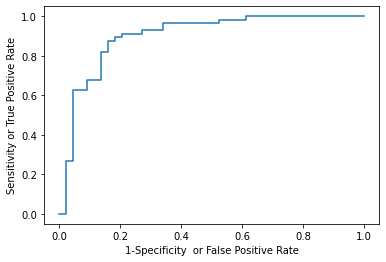

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score 
fpr_nb, tpr_nb, th_nb = roc_curve(cross_Y_test - 1, cross_y_test_prob)

plt.plot(fpr_nb, tpr_nb)
plt.xlabel("1-Specificity  or False Positive Rate")
plt.ylabel("Sensitivity or True Positive Rate")

##### Task 3.2: Make predictions with KNN (K = 3)

In [20]:
predictions_knn = np.zeros((100, 3))
for j,tx in enumerate(cross_X_test):
    knn_results = knn_classifier(cross_X_train, cross_Y_train, tx, K = 24)
    predictions_knn[j, 0] = knn_results['predicted_class']
    predictions_knn[j, 1:] = knn_results['predicted_score']

##### Task 3.3: Overlay the two ROC curves

Text(0, 0.5, 'Sensitivity or True Positive Rate')

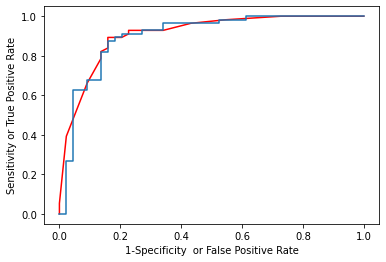

In [21]:
fpr_knn, tpr_knn, th_knn = roc_curve(cross_Y_test-1, predictions_knn[:,2])

plt.plot(fpr_knn, tpr_knn, "r")
plt.plot(fpr_nb, tpr_nb)
plt.xlabel("1-Specificity  or False Positive Rate")
plt.ylabel("Sensitivity or True Positive Rate")

##### Task 3.4:  Compute the AUC and generate confusion matrix for the two classifier 

AUCs range between 0.5 and 1. Higher AUC indicates better classifier

In [22]:
auc_knn = roc_auc_score(cross_Y_test-1, predictions_knn[:,2])
auc_nb = roc_auc_score(cross_Y_test - 1, cross_y_test_prob)
print(auc_knn)
print(auc_nb)

0.908887987012987
0.9005681818181819


In [23]:
def evaluation_summary(description, predictions, true_labels):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels, average='macro')
  recall = recall_score(predictions, true_labels, average='macro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels, 1, average='macro') #1 means f_1 measure
  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f" % (description,accuracy,precision,recall,f1))
  print(classification_report(predictions, true_labels, digits=3))


In [24]:
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.PuRd):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(12,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax



Evaluation for: description
Classifier 'description' has Acc=0.840 P=0.840 R=0.837 F1=0.838
              precision    recall  f1-score   support

         1.0      0.841     0.804     0.822        46
         2.0      0.839     0.870     0.855        54

    accuracy                          0.840       100
   macro avg      0.840     0.837     0.838       100
weighted avg      0.840     0.840     0.840       100

Confusion matrix, without normalization
[[37  7]
 [ 9 47]]


C:\Users\yingt\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass beta=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


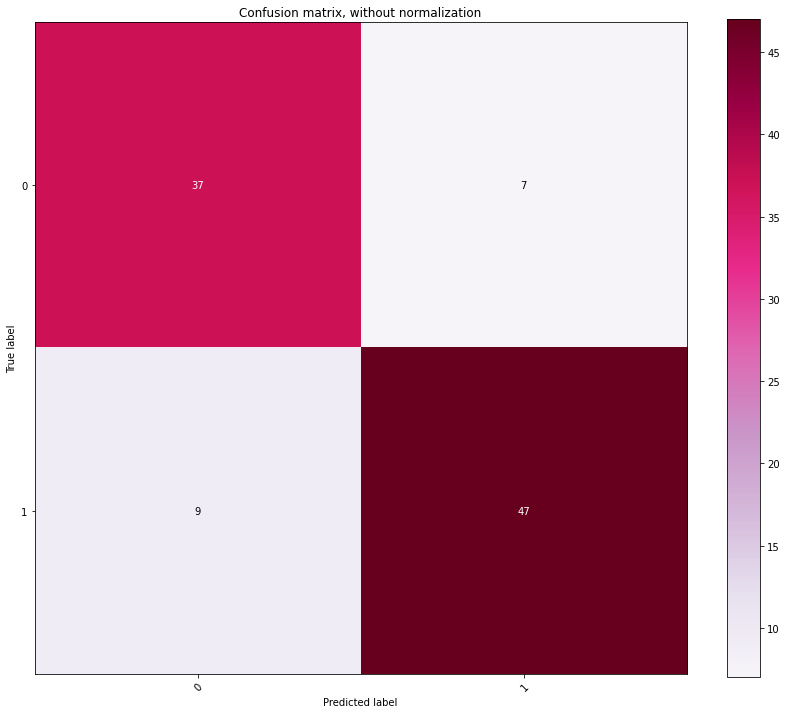

In [25]:
cross_X_train, cross_Y_train = cross_X_train, cross_Y_train.flatten()
cross_X_test, cross_Y_test = cross_X_test, cross_Y_test.flatten()
cross_priori, cross_stats = nb_train(cross_X_train, cross_Y_train)
cross_y_test_pred, cross_y_test_prob = predict(cross_priori, cross_stats, cross_X_test)
evaluation_summary("description", cross_y_test_pred, cross_Y_test)
plot_confusion_matrix(cross_Y_test, cross_y_test_pred,normalize=False,
                          title=None,
                          cmap=plt.cm.PuRd)